In [1]:
import os
import shutil
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import seaborn as sns

from utils import Condensate_Analysis


In [2]:
GFP_folder_path = "/Users/haotianli/Code/SIM/2_Frequency_Domain_Checked/SI_1.518_GFP"
GFP_Prox1_folder_path = "/Users/haotianli/Code/SIM/2_Frequency_Domain_Checked/SI_1.518_GFP__Prox1"
GFP_Prox1_6m_folder_path = "/Users/haotianli/Code/SIM/2_Frequency_Domain_Checked/SI_1.518_GFP_Prox1_6m"
GFP_Prox1_dN1N2_folder_path = "/Users/haotianli/Code/SIM/2_Frequency_Domain_Checked/SI_1.518_GFP__Prox1_dN1N2"
GFP_Prox1_dN1N2M_folder_path = "/Users/haotianli/Code/SIM/2_Frequency_Domain_Checked/SI_1.518_GFP__Prox1_dN1N2M"


GFP_class = Condensate_Analysis(GFP_folder_path)
GFP_Prox1_class = Condensate_Analysis(GFP_Prox1_folder_path)
GFP_Prox1_6m_class = Condensate_Analysis(GFP_Prox1_6m_folder_path)
GFP_Prox1_dN1N2_class = Condensate_Analysis(GFP_Prox1_dN1N2_folder_path)
GFP_Prox1_dN1N2M_class = Condensate_Analysis(GFP_Prox1_dN1N2M_folder_path)

GFP_expression_list, GFP_masked_figure_path_list = GFP_class.calculate_expression_level()
GFP_Prox1_expression_list, GFP_Prox1_masked_figure_path_list = GFP_Prox1_class.calculate_expression_level()
GFP_Prox1_6m_expression_list, GFP_Prox1_6m_masked_figure_path_list = GFP_Prox1_6m_class.calculate_expression_level()
GFP_Prox1_dN1N2_expression_list, GFP_Prox1_dN1N2_masked_figure_path_list = GFP_Prox1_dN1N2_class.calculate_expression_level()
GFP_Prox1_dN1N2M_expression_list, GFP_Prox1_dN1N2M_masked_figure_path_list = GFP_Prox1_dN1N2M_class.calculate_expression_level()
# expression_list: tuple list, every tuple has the form (recon_masked_path, expression_level)
# masked_figure_path_list: list list, every son list has the form [ori_masked_path, recon_masked_path, 2D_mask_ori_path, 2D_mask_recon_path]

In [3]:
print(len(GFP_expression_list))
print(len(GFP_Prox1_expression_list))
print(len(GFP_Prox1_6m_expression_list))
print(len(GFP_Prox1_dN1N2_expression_list))
print(len(GFP_Prox1_dN1N2M_expression_list))

63
15
13
40
58


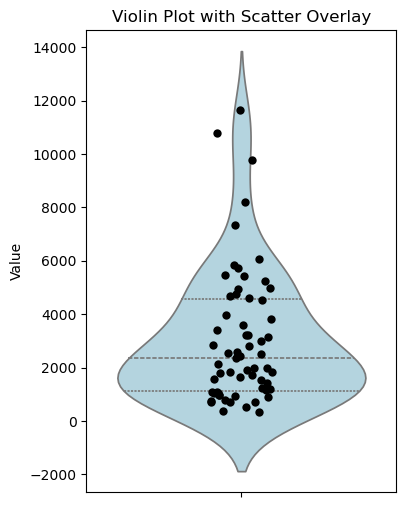

In [4]:
GFP_expression_level_data = [data[1] for data in GFP_expression_list]
plt.figure(figsize=(4, 6))

sns.violinplot(y=GFP_expression_level_data, inner="quart", color="lightblue")
sns.stripplot(y=GFP_expression_level_data, color="black", size=6, jitter=0.1)

plt.ylabel("Value")
plt.title("Violin Plot with Scatter Overlay")
plt.show()

/var/folders/yn/cf10_z15625fry9tyf30rq280000gn/T/ipykernel_4509/2177140414.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Group", y="Value", data=df, inner="quart", palette="pastel")


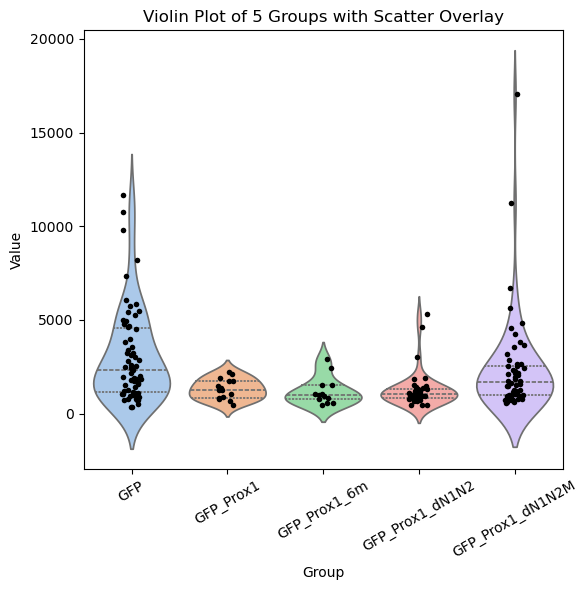

In [5]:
import seaborn as sns
import pandas as pd

GFP_expression_level_data = [data[1] for data in GFP_expression_list]
GFP_Prox1_expression_level_data = [data[1] for data in GFP_Prox1_expression_list]
GFP_Prox1_6m_expression_level_data = [data[1] for data in GFP_Prox1_6m_expression_list]
GFP_Prox1_dN1N2_expression_level_data = [data[1] for data in GFP_Prox1_dN1N2_expression_list]
GFP_Prox1_dN1N2M_expression_level_data = [data[1] for data in GFP_Prox1_dN1N2M_expression_list]

df = pd.DataFrame({
    "Value": GFP_expression_level_data + 
             GFP_Prox1_expression_level_data +
             GFP_Prox1_6m_expression_level_data +
             GFP_Prox1_dN1N2_expression_level_data +
             GFP_Prox1_dN1N2M_expression_level_data,
    "Group": (["GFP"] * len(GFP_expression_level_data) +
              ["GFP_Prox1"] * len(GFP_Prox1_expression_level_data) +
              ["GFP_Prox1_6m"] * len(GFP_Prox1_6m_expression_level_data) +
              ["GFP_Prox1_dN1N2"] * len(GFP_Prox1_dN1N2_expression_level_data) +
              ["GFP_Prox1_dN1N2M"] * len(GFP_Prox1_dN1N2M_expression_level_data))
})

plt.figure(figsize=(6, 6))
sns.violinplot(x="Group", y="Value", data=df, inner="quart", palette="pastel")
sns.stripplot(x="Group", y="Value", data=df, color="black", size=4, jitter=0.1)

plt.ylabel("Value")
plt.title("Violin Plot of 5 Groups with Scatter Overlay")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [6]:
### Select Cell
min_expression_level = 1000
max_expression_level = 2000

GFP_selected = []
GFP_Prox1_selected = []
GFP_Prox1_6m_selected = []
GFP_Prox1_dN1N2_selected = []
GFP_Prox1_dN1N2M_selected = []

for data in GFP_expression_list:
    if min_expression_level < data[1] < max_expression_level:
        GFP_selected.append(data)

for data in GFP_Prox1_expression_list:
    if min_expression_level < data[1] < max_expression_level:
        GFP_Prox1_selected.append(data)

for data in GFP_Prox1_6m_expression_list:
    if min_expression_level < data[1] < max_expression_level:
        GFP_Prox1_6m_selected.append(data)

for data in GFP_Prox1_dN1N2_expression_list:
    if min_expression_level < data[1] < max_expression_level:
        GFP_Prox1_dN1N2_selected.append(data)

for data in GFP_Prox1_dN1N2M_expression_list:
    if min_expression_level < data[1] < max_expression_level:
        GFP_Prox1_dN1N2M_selected.append(data)
        
### Welch_ANOVA_test
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.oneway import anova_oneway

# (masked_recon, expression_value)
def extract_expression(data_list):
    return [d[1] for d in data_list]

group1 = extract_expression(GFP_selected)
group2 = extract_expression(GFP_Prox1_selected)
group3 = extract_expression(GFP_Prox1_6m_selected)
group4 = extract_expression(GFP_Prox1_dN1N2_selected)
group5 = extract_expression(GFP_Prox1_dN1N2M_selected)

# Welch’s ANOVA
result = anova_oneway([group1, group2, group3, group4, group5],
                      use_var="unequal",  # Welch
                      welch_correction=True)

print(result)


statistic = 1.611626657061743
pvalue = 0.21178665845183006
df = (4.0, np.float64(19.262528693068806))
df_num = 4.0
df_denom = 19.262528693068806
nobs_t = 68.0
n_groups = 5
means = [1504.96904203 1470.87433994 1224.47939599 1288.83328105 1390.54452403]
nobs = [18.  8.  5. 19. 18.]
vars_ = [119056.52861534  83292.91502806  75100.92256316  66117.22100876
      91683.73286281]
use_var = unequal
welch_correction = True
tuple = (np.float64(1.611626657061743), np.float64(0.21178665845183006))


In [7]:
## add selected figures
GFP_class.selected_figures = GFP_selected
GFP_Prox1_class.selected_figures = GFP_Prox1_selected
GFP_Prox1_6m_class.selected_figures = GFP_Prox1_6m_selected
GFP_Prox1_dN1N2_class.selected_figures = GFP_Prox1_dN1N2_selected
GFP_Prox1_dN1N2M_class.selected_figures = GFP_Prox1_dN1N2M_selected



In [8]:
df_GFP, all_cells_GFP = GFP_class.calculate_condensate_property(percentile=0.01, identify_parameter={"voxel_size":[0.125, 0.04, 0.04]})
df_GFP_Prox1, all_cells_GFP_Prox1 = GFP_Prox1_class.calculate_condensate_property(percentile=0.01, identify_parameter={"voxel_size":[0.125, 0.04, 0.04]})
df_GFP_Prox1_6m, all_cells_GFP_Prox1_6m = GFP_Prox1_6m_class.calculate_condensate_property(percentile=0.01, identify_parameter={"voxel_size":[0.125, 0.04, 0.04]})
df_GFP_Prox1_dN1N2, all_cells_GFP_Prox1_dN1N2 = GFP_Prox1_dN1N2_class.calculate_condensate_property(percentile=0.01, identify_parameter={"voxel_size":[0.125, 0.04, 0.04]})
df_GFP_Prox1_dN1N2M, all_cells_GFP_Prox1_dN1N2M = GFP_Prox1_dN1N2M_class.calculate_condensate_property(percentile=0.01, identify_parameter={"voxel_size":[0.125, 0.04, 0.04]})
# 0.04x0.04x0.125

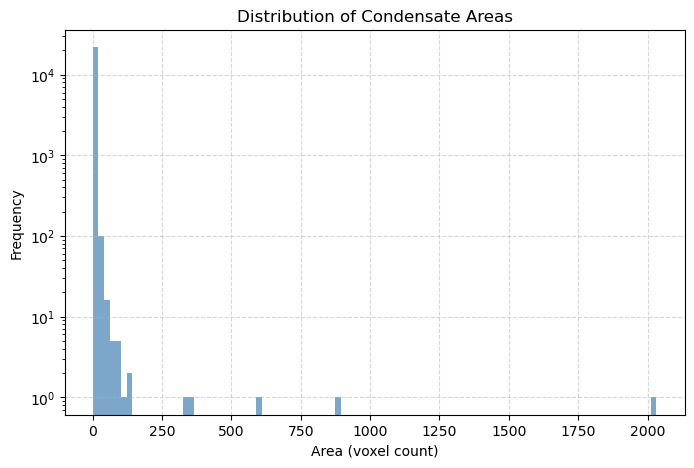

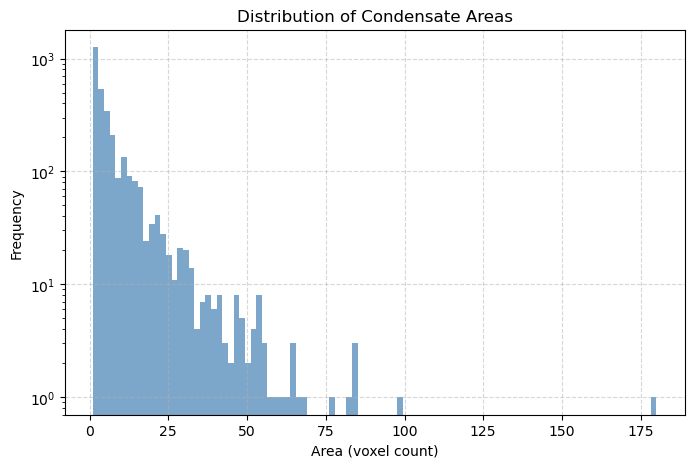

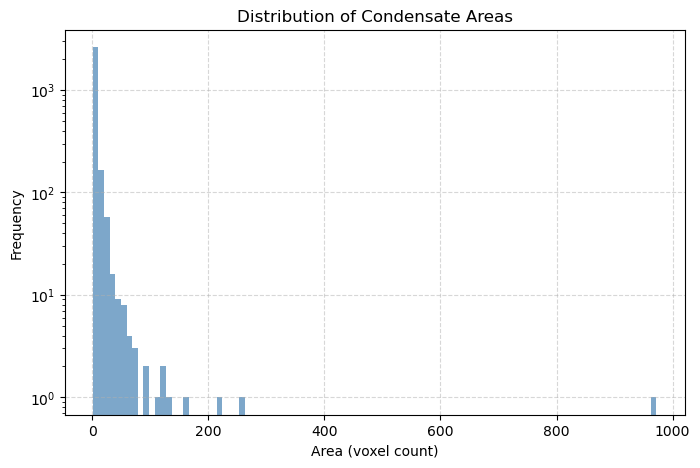

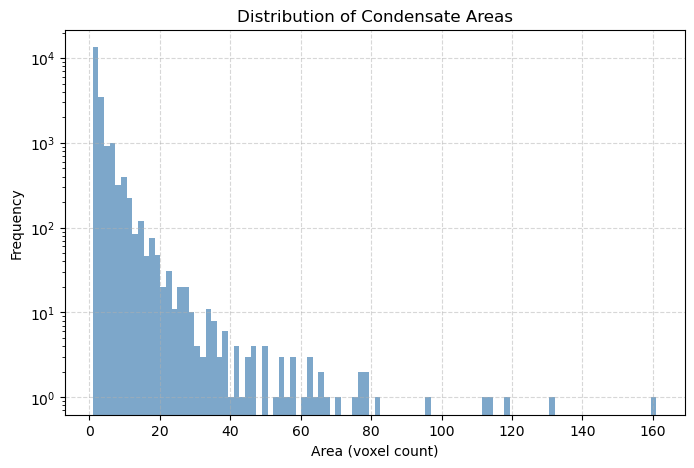

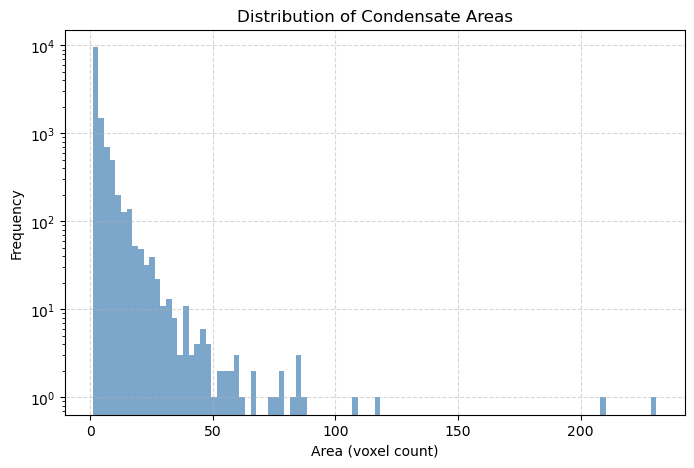

In [9]:
def plot_area_distribution(df):
    plt.figure(figsize=(8,5))
    plt.hist(df["area"], bins=100, color="steelblue", alpha=0.7)
    plt.xlabel("Area (voxel count)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Condensate Areas")
    plt.yscale("log")  # 使用对数尺度，避免大数量小颗粒掩盖大颗粒
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


plot_area_distribution(df_GFP)
plot_area_distribution(df_GFP_Prox1)
plot_area_distribution(df_GFP_Prox1_6m)
plot_area_distribution(df_GFP_Prox1_dN1N2)
plot_area_distribution(df_GFP_Prox1_dN1N2M)

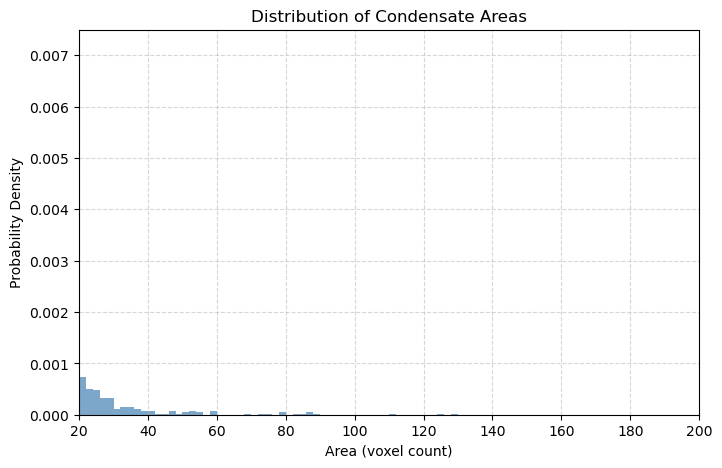

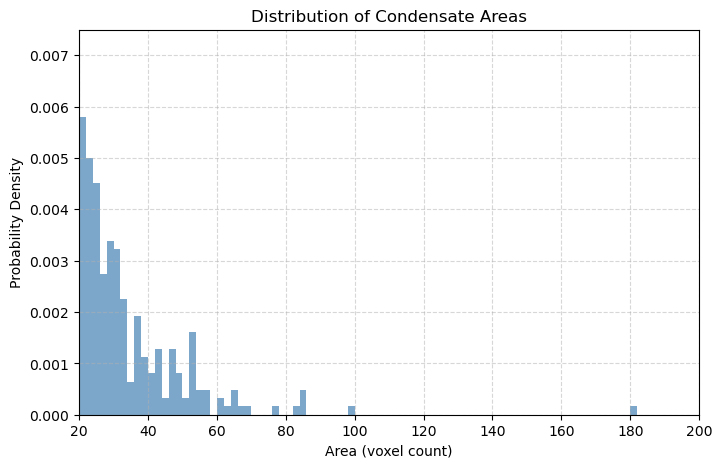

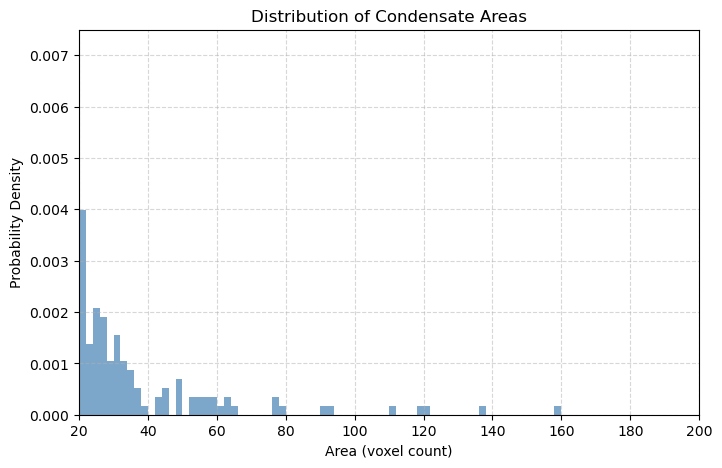

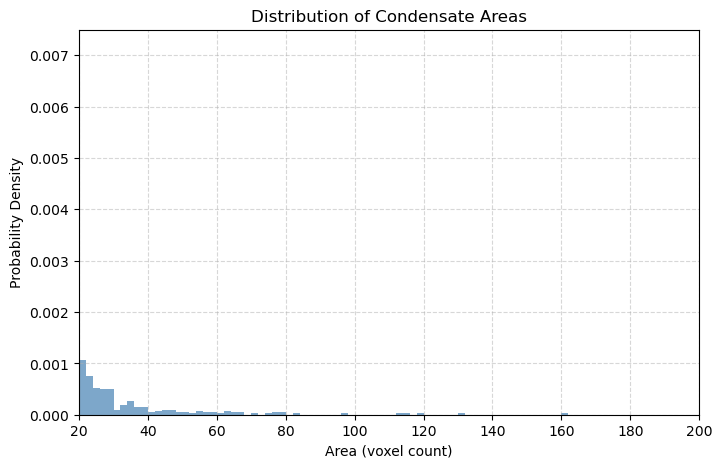

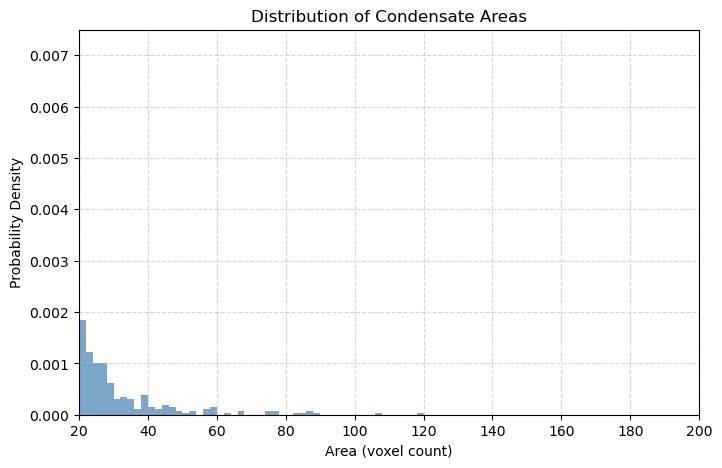

In [19]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 200, 101)

def plot_area_distribution(df, bins=bins):
    data = df["area"]  # 不先过滤
    plt.figure(figsize=(8,5))
    plt.hist(data, bins=bins, color="steelblue", alpha=0.7, density=True)
    plt.xlabel("Area (voxel count)")
    plt.ylabel("Probability Density")
    plt.title("Distribution of Condensate Areas")
    # plt.yscale("log")
    plt.xlim(20, 200)   # 只显示20-200
    plt.ylim(0, 0.0075)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()





plot_area_distribution(df_GFP)
plot_area_distribution(df_GFP_Prox1)
plot_area_distribution(df_GFP_Prox1_6m)
plot_area_distribution(df_GFP_Prox1_dN1N2)
plot_area_distribution(df_GFP_Prox1_dN1N2M)


In [10]:
GFP_Prox1_class.visualization()

In [11]:
print(tiff.imread(GFP_Prox1_class.selected_figures[0][0]).shape)

(9, 1024, 1024)


/Users/haotianli/miniconda3/envs/SIM/lib/python3.13/site-packages/napari/layers/labels/labels.py:908: UserWarning: Contours are not displayed during 3D rendering
  warnings.warn(
2025-08-16 17:14:16.617 python[4509:41426680] error messaging the mach port for IMKCFRunLoopWakeUpReliable
2025-08-16 17:15:21.165 python[4509:41426680] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit
Traceback (most recent call last):
  File "/Users/haotianli/miniconda3/envs/SIM/lib/python3.13/site-packages/vispy/util/event.py", line 469, in _invoke_callback
    cb(event)
    ~~^^^^^^^
  File "/Users/haotianli/miniconda3/envs/SIM/lib/python3.13/site-packages/napari/_vispy/camera.py", line 284, in viewbox_mouse_event
    super().viewbox_mouse_event(event)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^
  File "/Users/haotianli/miniconda3/envs/SIM/lib/python3.13/site-packages/vispy/scene/cameras/perspective.py", line 238, in viewbox_mouse_event
    self._update_rotation(event)
 